In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# load in data
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRxp-hsw61ck9cpt5ExZIUhvSGT5zYzoUJl_7xr7YF5qZeazC8393q2taqwkDvMxVirgFDJm1WX3uAC/pub?output=csv')
females = df.loc[ df['Gender'] == 'Female'].copy()

In [3]:
# For more reproducible code, we will define a variable for our data.
data = females['Height']

In [4]:
# define the low and high end
low_end = 55.0
high_end = 56.0

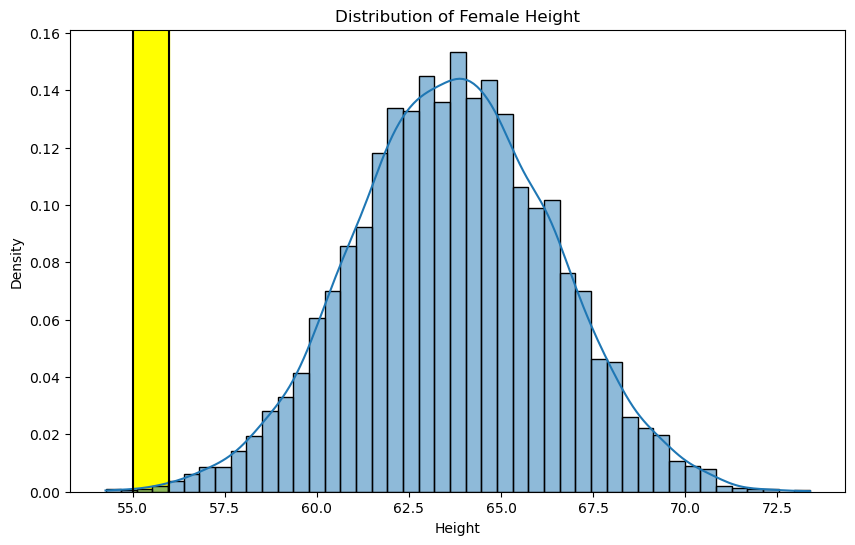

In [5]:
# visualize low and high end
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(x=data, stat='density',kde=True)
ax.set_title('Distribution of Female Height')
ax.axvline(low_end, color= 'black')
ax.axvline(high_end, color ='black')
ax.axvspan(low_end, high_end, color ='yellow', zorder = 0);

In [6]:
mean = np.mean(data)
std = np.std(data)
min = np.min(data)
max = np.max(data)

In [7]:
# Set the range and spacing for our normal curve
x_range = np.linspace(min, max,1000)

In [8]:
# We can also create the cdf for normal data with our mean and std
cdf = stats.norm.cdf(x_range, loc=mean, scale=std)

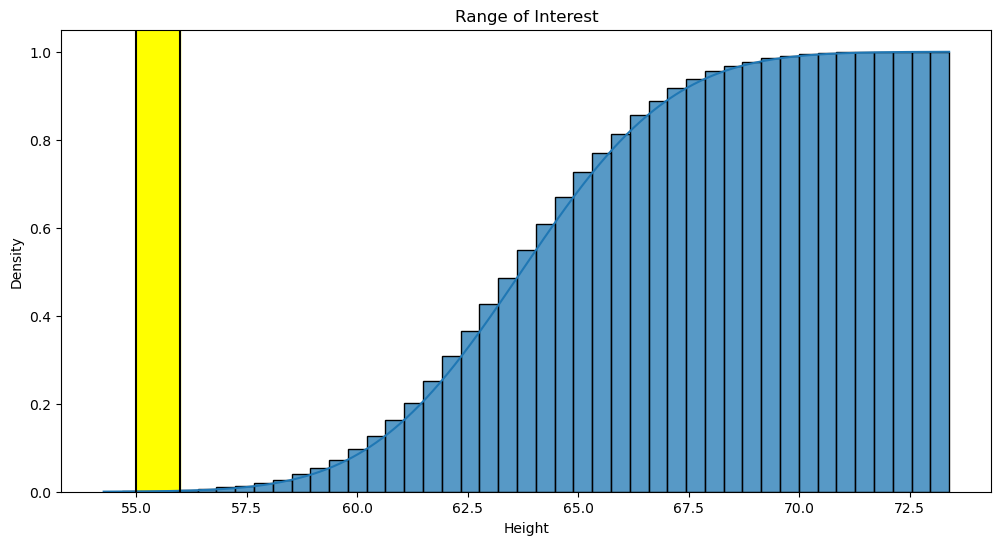

In [9]:
# visualizing the range of interest
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=data, stat='density', cumulative = True)
ax.plot(x_range,cdf)
ax.axvline(low_end, color= 'black')
ax.axvline(high_end, color ='black')
ax.axvspan(low_end, high_end, color ='yellow', zorder = 0)
ax.set_title('Range of Interest');

In [10]:
# subtract to find the probability of a value occurring in the range
stats.norm.cdf(high_end, loc=mean,scale=std) - stats.norm.cdf(low_end,loc=mean, scale=std)

0.0015043054289559897

The probability of height being between 55 and 56 inches is 0.15%, a very small probability.

In [11]:
# calculate the probability of the height 60 inches or greater, we subtract from 1.
stats.norm.cdf(60, loc=mean,scale=std)

0.08446492725207488

The probability of the height being greater than 60 inches is 8.4%.

In [12]:
# calculate the probability of the height greater than the mean, we subtract from 1.
1 -stats.norm.cdf(mean, loc=mean,scale=std)

0.5

The probability of height, or any statistic for that matter, greater than or less than the mean will always be 50%.